# Mini-Challenge 1: Hyperparameter und Model Tuning 

## 0. Librarys

In [1]:
import pandas as pd
import numpy as np
import random
import os
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

## 1. Explore the Data

### 1.1 Volume

In [2]:
animals = ["bird","cat","dog","fish","horse"]
volume = []
for animal in animals:
    folder="Data_Scraping/Bilder/"+animal
    list = os.listdir(folder)
    number_files = len(list)
    print(animal, number_files)
    volume.append(number_files)
    
print("\nVolume of all classes: {}".format(sum(volume)))

bird 9785
cat 9961
dog 8123
fish 9403
horse 8940

Volume of all classes: 46212


### 1.2 Samples

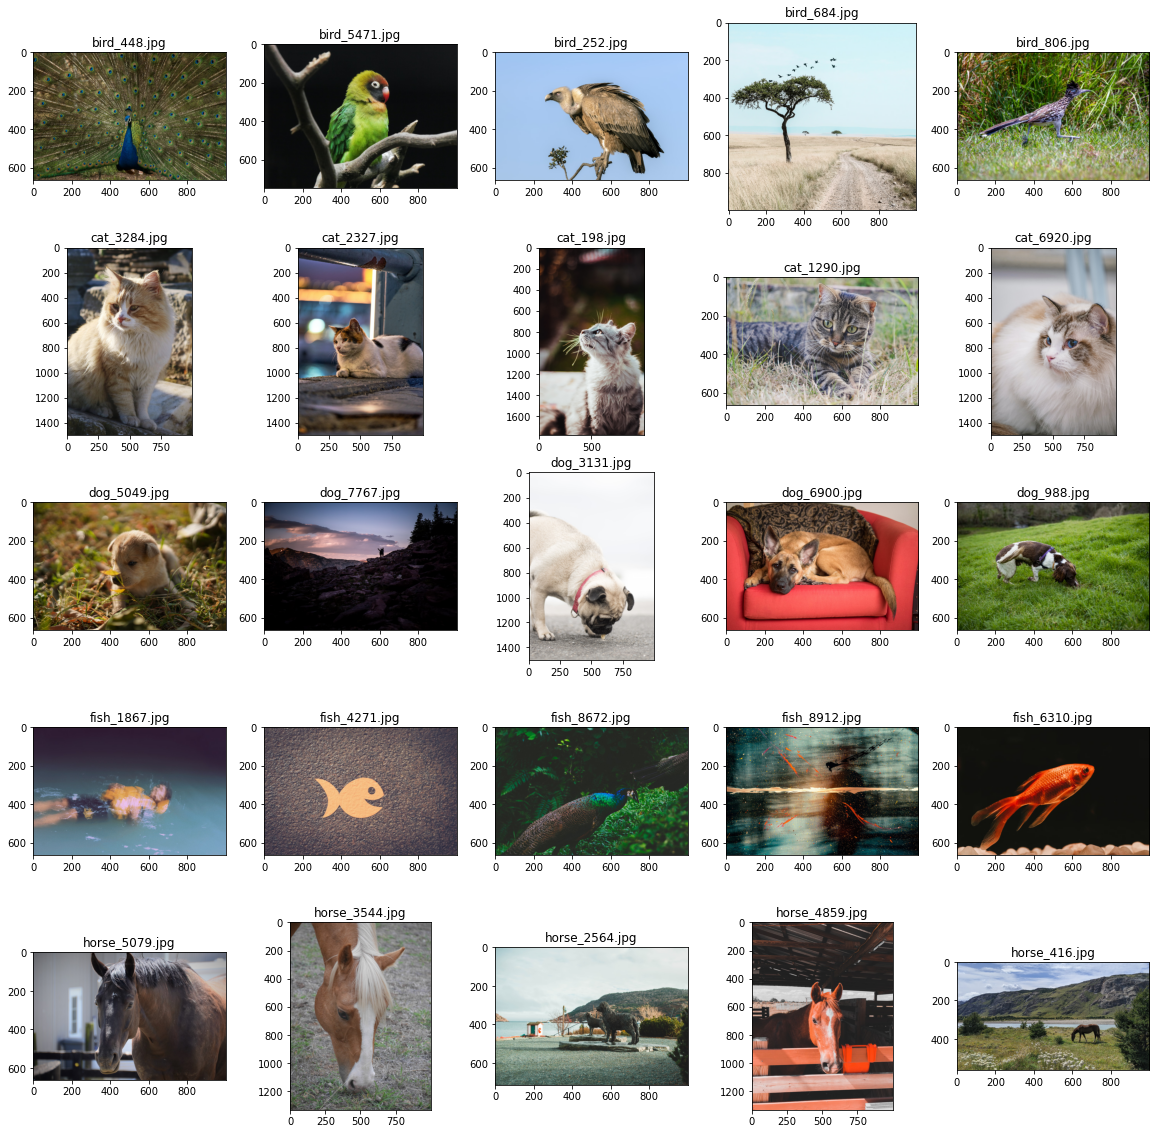

In [27]:
plt.figure(figsize=(20,20))
animals = ["bird","cat","dog","fish","horse"]
k = 0
random.seed(4)

for animal in animals:
    test_folder="Data_Scraping/Bilder/"+animal
    
    for i in range(5):
        file = random.choice(os.listdir(test_folder))
        image_path= os.path.join(test_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(5,5,k+1)
        ax.title.set_text(file)
        plt.imshow(img)
        k = k+1    

### 1.3 Preprocess and load Data

In [189]:
def image_loader(image_size=32, batch_size=4, root="Images/",num_workers=2,shuffle=False):
    transform = transforms.Compose([
        transforms.Resize((50, 50)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    data_set = torchvision.datasets.ImageFolder(root=root, transform=transform)
    data_loader = torch.utils.data.DataLoader(data_set, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

    return data_loader

classes = ("bird","cat","dog","fish","horse")

In [190]:
train_path='Data_Scraping/train_test/train/'
test_path='Data_Scraping/train_test/test/'
batch_size = 4

trainloader = image_loader(batch_size = batch_size,root=train_path,shuffle=True)
testloader = image_loader(batch_size = batch_size,root=test_path,shuffle=False)

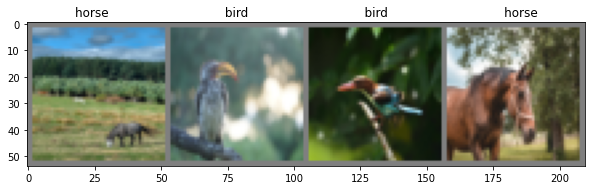

In [191]:
def images_show(img):
    plt.figure(figsize=(10,5))
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title("                              ".join("%s" % classes[labels[k]] for k in range(batch_size)))

sample_data = iter(trainloader)
images, labels = sample_data.next()
images_show(torchvision.utils.make_grid(images))

## 2. Define the Modell

### 2.1 Metrics

At the beginning we will visualize a confusion matrix and can see how the model behaves and which values result. Then we derive the following metrics from this and can compare the different models.
$$Precision = \frac{TP} {TP+FP}$$

$$Recall = \frac{TP} {TP+FN}$$

$$F_1 =\big{(}\frac{1/Precision+1/Recall} {2}\big{)}^{-1}$$

The Precision is calculated as in the equation below and indicates the proportion of correctly predicted positive results (TP) in relation to the total of all results predicted as positive (P).
The recall indicates the proportion of results correctly classified as positive (TP) in relation to the totality of actually positive results (P). The F1 score is the harmonic mean of Precision and Recall and is often used as a summary metric. Therefore we will mainly use F1-Score as our metric


### 2.2 Basic functionality

## 3. Training with SGD (without REG, without BN)

## 4. Benefits of Regularization

### 4.1 Different regularization methods

### 4.2 Evaluation

## 5  Benefits of Batchnorm BN (without REG, with SGD)

## 6.  Benefits of Adam (without BN, without/with REG)

### 5.1 Evaluation

### 5.2 Interpretieren